# Question 1

Is there a difference in the business stars by major categories (Restaurants, Shopping, Nightlife, ...)? Any differences in Restaurant categories?

In [8]:
import pandas as pd
import ProcessData as p
import matplotlib.pyplot as plt
%matplotlib inline

# Read in data   
business_file = 'yelp_dataset/yelp_academic_dataset_business.json'
business_df = pd.read_json(business_file, lines=True)
print(business_df.shape)
num_obs = business_df.shape[0]

(188593, 15)


## Major Categories

The categories chosen are the ones displayed by Yelp under "Browse Businesses by Category". Note: these categories are not mutually exclusive so a business can have multiple categories.

In [9]:
categories = ['Restaurants', 'Shopping', 'Nightlife', 'Active Life', 'Beauty & Spas', 'Automotive', 'Home Services']
business_df = p.process_business(business_df, categories)

In [10]:
business_df.columns

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name',
       ...
       'Smoking', 'WheelchairAccessible', 'WiFi', 'Restaurants', 'Shopping',
       'Nightlife', 'Active Life', 'Beauty & Spas', 'Automotive',
       'Home Services'],
      dtype='object', length=103)

In [11]:
counts_by_category = business_df[categories].sum()
print(counts_by_category.sort_values(ascending=False))
counts_by_category_sum = counts_by_category.sum()
print('Sum of main categories: ', counts_by_category_sum)
print('Percentage of observations: ', counts_by_category_sum/num_obs)

Restaurants      57173
Shopping         30231
Beauty & Spas    18967
Home Services    18634
Automotive       12656
Nightlife        12438
Active Life       9119
dtype: int64
Sum of main categories:  159218
Percentage of observations:  0.844241302699464


We see that the restaurant category has the largest number of business. Also, the number of businesses labeled by the main categories is 84% of the total number of observations.

Restaurants      0.303155
Shopping         0.160298
Nightlife        0.065952
Active Life      0.048353
Beauty & Spas    0.100571
Automotive       0.067107
Home Services    0.098805
dtype: float64


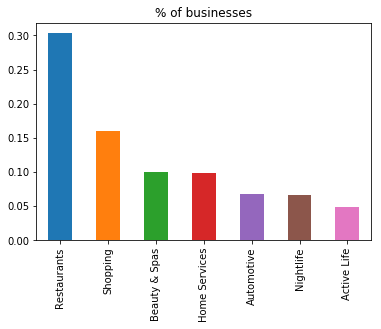

In [12]:
per_counts_by_category = business_df[categories].sum()/num_obs
print(per_counts_by_category)
per_counts_by_category.sort_values(ascending=False).plot.bar(title='% of businesses')

In [13]:
# Function for getting the mean stars for a list of categories
def get_mean_stars(df, df_cats, cats):
    means = {}
    for cat in cats:
        means[cat] = df[df_cats[cat] == True].stars.mean()
    return pd.Series(means)

In [14]:
categories_mean_stars = get_mean_stars(business_df, business_df, categories)
categories_mean_stars.sort_values(ascending=False)

Active Life      4.077640
Beauty & Spas    3.932725
Home Services    3.643796
Shopping         3.642337
Automotive       3.598728
Nightlife        3.534250
Restaurants      3.444930
dtype: float64

3.6315504817251965


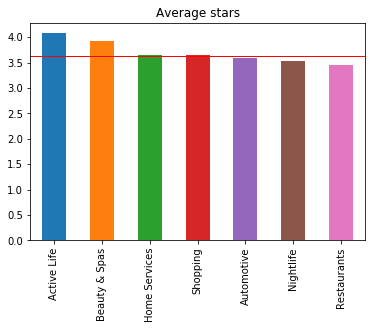

In [16]:
categories_mean_stars.sort_values(ascending=False).plot.bar(title='Average stars')
overall_mean = business_df.stars.mean() 
print(overall_mean)
plt.axhline(y=overall_mean, linewidth=1, color='r')

## Restaurants

In [19]:
restaurants_df = business_df[business_df.Restaurants == True]
restaurants_df.shape

(57173, 103)

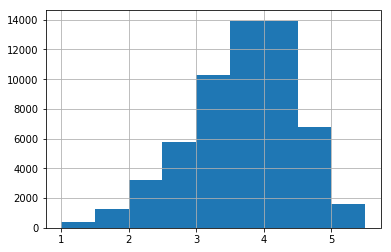

In [20]:
restaurants_df.stars.hist(bins=[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5])

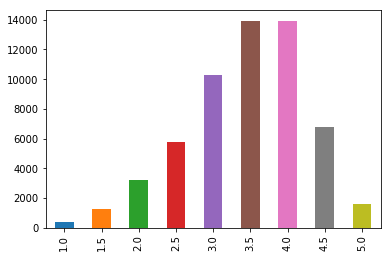

In [21]:
restaurants_df.stars.value_counts().sort_index().plot.bar()

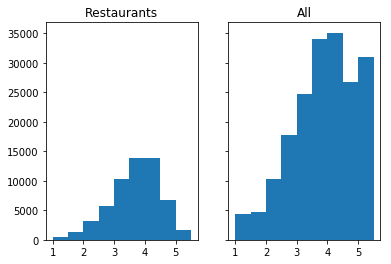

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(restaurants_df.stars, bins=[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5])
ax1.set_title('Restaurants')
ax2.hist(business_df.stars, bins=[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5])
ax2.set_title('All')
plt.show()

## Restaurant Categories

In [24]:
restaurant_cats = restaurants_df.categories.str.get_dummies(sep=', ')

In [25]:
restaurant_cats.head()

,& Probates,Acai Bowls,Accessories,Accountants,Active Life,Acupuncture,Adult Education,Adult Entertainment,Advertising,Afghan,...,Wine Bars,Wine Tasting Classes,Wine Tasting Room,Wine Tours,Wineries,Women's Clothing,Wraps,Yelp Events,Yoga,Zoos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
restaurants_df[restaurants_df.categories.str.contains('Probate')]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,...,Smoking,WheelchairAccessible,WiFi,Restaurants,Shopping,Nightlife,Active Life,Beauty & Spas,Automotive,Home Services
177741,"4035 W Chandler Blvd, Ste 4","{'Alcohol': 'none', 'BikeParking': 'False', 'B...",q_B7QQi1FzmT4Axw6ZrnJA,"Food, Bankruptcy Law, Lawyers, Pizza, Tax Serv...",Chandler,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.304735,-111.912146,Law Office of James J Gentile,...,False,False,False,True,False,False,False,False,False,False


In [27]:
categories = restaurants_df[restaurants_df.categories.str.contains('Probate')].categories
print(categories.iloc[0])

Food, Bankruptcy Law, Lawyers, Pizza, Tax Services, Ice Cream & Frozen Yogurt, Professional Services, Financial Services, Business Consulting, Estate Planning Law, Restaurants, Tax Law, Wills, Trusts, & Probates


Ok, that was a strange list of categories for business.<p>
To continue, let's look at the top 25 most frequent categories.

In [28]:
restaurant_cats.sum().sort_values(ascending=False)[:25]

Restaurants                  57173
Food                         11667
Nightlife                     7948
Bars                          7646
Sandwiches                    6912
Fast Food                     6812
American (Traditional)        6659
Pizza                         6603
Burgers                       5126
Breakfast & Brunch            5023
Italian                       4550
Mexican                       4419
Chinese                       4247
American (New)                4230
Coffee & Tea                  3108
Cafes                         3056
Japanese                      2566
Chicken Wings                 2538
Seafood                       2369
Salad                         2350
Event Planning & Services     2247
Sushi Bars                    2156
Delis                         1835
Canadian (New)                1828
Asian Fusion                  1780
dtype: int64

We can drop 'Restaurants', 'Food', and 'Nightlife' because they don't tell us anything about the type of restaurant. We'll also drop 'Event Planning & Services' because that doesn't really indicate a restaurant.

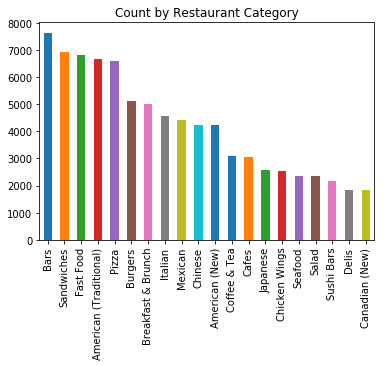

In [37]:
restaurant_cats.drop(['Restaurants', 'Food', 'Nightlife', 'Event Planning & Services'], axis='columns', inplace=True)
restaurant_cats.sum().sort_values(ascending=False)[:20].plot.bar(title = 'Count by Restaurant Category')

In [39]:
rest_stars_mean = restaurants_df[restaurants_df.Restaurants == True].stars.mean()
rest_stars_mean

3.4449302992671367

In [31]:
top20 = restaurant_cats.sum().sort_values(ascending=False)[:20]
restaurant_means_df = get_mean_stars(restaurants_df, restaurant_cats, top20.index)

print(restaurant_means_df.sort_values(ascending=False))

Cafes                     3.823789
Delis                     3.612807
Salad                     3.600638
Sushi Bars                3.583952
Breakfast & Brunch        3.579335
Japanese                  3.577747
Seafood                   3.570283
American (New)            3.533806
Coffee & Tea              3.501770
Italian                   3.494725
Bars                      3.490845
Sandwiches                3.465929
Canadian (New)            3.463895
Mexican                   3.436977
Pizza                     3.326670
American (Traditional)    3.318817
Chinese                   3.312809
Burgers                   3.025263
Chicken Wings             2.959417
Fast Food                 2.825822
dtype: float64


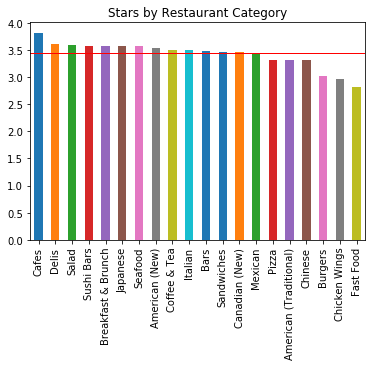

In [40]:
restaurant_means_df.sort_values(ascending=False).plot.bar(title = 'Stars by Restaurant Category')
plt.axhline(y=rest_stars_mean, linewidth=1, color='r')

In [33]:
restaurants_df = pd.concat([restaurants_df, restaurant_cats[top20.index]], axis='columns')
restaurants_df.columns

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name',
       ...
       'American (New)', 'Coffee & Tea', 'Cafes', 'Japanese', 'Chicken Wings',
       'Seafood', 'Salad', 'Sushi Bars', 'Delis', 'Canadian (New)'],
      dtype='object', length=123)

In [34]:
restaurants_df[restaurant_cats[top20.index].sum(axis=1) > 1].categories

1         Chicken Wings, Burgers, Caterers, Street Vendo...
2         Breakfast & Brunch, Restaurants, French, Sandw...
12        Bars, Sports Bars, Dive Bars, Burgers, Nightli...
15                           Delis, Restaurants, Sandwiches
16        Nightlife, Bars, American (Traditional), Tapas...
21                          Fast Food, Burgers, Restaurants
22        Nightlife, Bars, American (Traditional), Sport...
27          Restaurants, Food, Canadian (New), Coffee & Tea
30        Nightlife, Restaurants, Bars, Chicken Wings, A...
32                       Fast Food, Restaurants, Sandwiches
33        Beer, Wine & Spirits, Italian, Food, American ...
39                            Pizza, Fast Food, Restaurants
41        Coffee & Tea, Food, Breakfast & Brunch, Restau...
47        Event Planning & Services, Soup, Salad, Mexica...
59                 Fast Food, Restaurants, Sandwiches, Food
73        Asian Fusion, Caterers, Fast Food, Chinese, Re...
88        Restaurants, Food, Coffee & Te

In [35]:
# Export to csv for use with Tableau
restaurants_df.to_csv('yelp_restaurants.csv')